<a href="https://github.com/SumanRajSharma"><img src="banner.png"></a>

## Data

The dataset used is a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. (https://en.wikipedia.org/wiki/LendingClub)

## Task

The given historical data on loans gives information on whether or not the borrower defaulted (failure to pay back the loan - **charge-off**). The task is to build a deep learning neural network model that can assess how likely a new potential customer is to pay back the loan.
*loan_status* column in the dataset contails the target label - *Charged Off* or *Fully Paid*

We have 28 features including the target label column. 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

## Data files

Attached with this notebook is two csv files. 
- **lending_club_info.csv** which includes the features and their descriptions. Metadata of dataset.
- **lending_club_loan.csv** which has the actual data.

I have created a handy function that returns the desciption text associated with a feature when the feature name is passed. It would help in easy lookup/sneak-peak of what the feature is about.

In [2]:
# Loading pandas library
import pandas as pd

# Reading from lending_club_info.csv
data_info = pd.read_csv('lending_club_info.csv', index_col='Features')

In [3]:
def get_feature_info(feature_name):
    print(data_info.loc[feature_name]['Description'])

In [4]:
get_feature_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


## Import Libraries

I have imported numpy, matplotlib and seaborn library for now which will be required for Exploratory Data Analysis

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset

In [27]:
df = pd.read_csv('lending_club_loan.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## Exploratory Data Analysis

Understanding which variables/features are important. Let's start by viewing the data types of the variables/features followed by summary statistics.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

We can see from above that variables are either **string** object of **floating point** values. Next let's view the summary statistics (count, mean, std, min, max, etc.) of each numeric variable.

### Summary Statistics

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


### Countplot - target labels
With count plot we can see how balance the dataset is based on target variable.

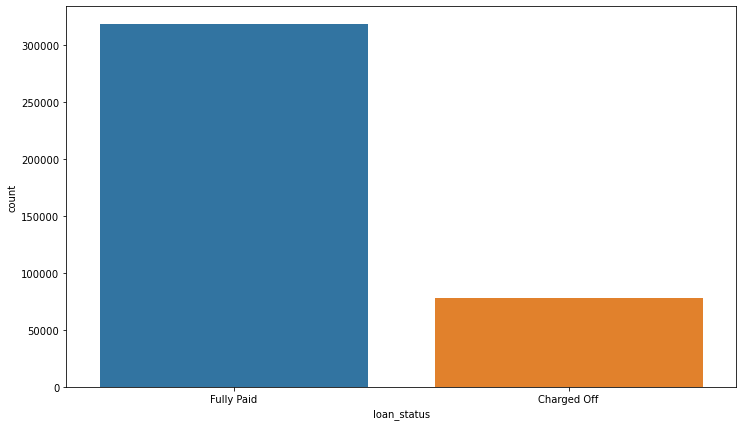

In [30]:
plt.figure(figsize=(12,7))
sns.countplot(x='loan_status', data=df)

Hmmm... Interesting, the dataset seems to be imbalanced which might affect the performance of the model. For now, I am continuing with EDA but we might need to consider techniques (Up sampling, Down sampling or other techniques) to make this dataset balance.

### Distribution plot
Let's see the distribution of dataset for **loan_amnt** attribute. Is it a normal distribution or skewed?

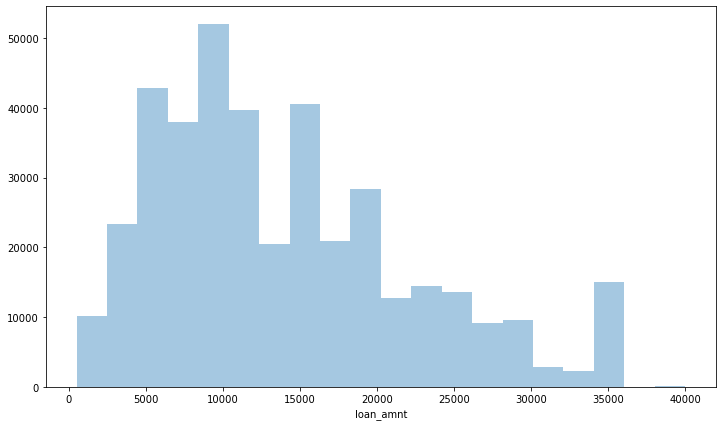

In [31]:
plt.figure(figsize=(12,7))
sns.distplot(df['loan_amnt'], bins=20, kde=False)

The distribution seems to be right skewed for **loan_amnt**

### Correlation of continuous variables


In [32]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


It is difficult to go through all correlation coeff ato find out highly correlated attributes. Therefore, lets plot a heatmap to visualise it.

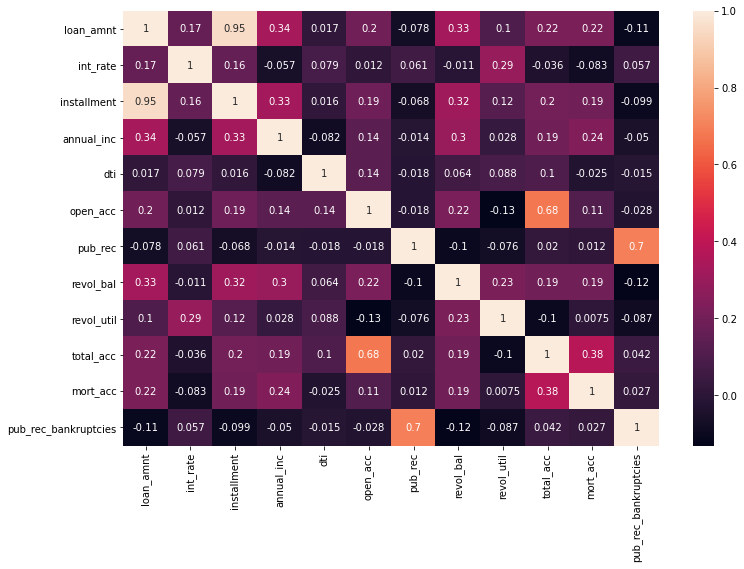

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

- **installment** seems to have a high positive correlation with **loan_amnt** which is obvious. Larger the loan amount larger will be the instalment.
- Similarly, **total_acc** and **open_acc** also have a strong correlation; the total number of credit lines currently in the borrower's credit file increases as the number of open credit lines in the borrower's credit file increase.
- Lastly, **pub_rec** and **pub_rec_bankrupties** is also positively correlated; the number of public record bankruptcies increases as the number of derogatory public records increase which is true because derogatory public records hold records that are at high risk, missed payments or ultimately failed to pay.

As we noticed, there somewhat a perfect correlation among **installment** and **loan_amnt**. Let's explore these features further with scatterplot.

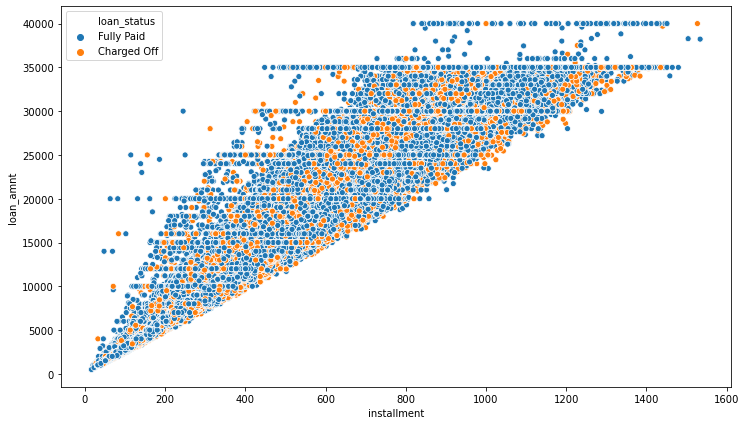

In [34]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='installment', y='loan_amnt', data=df, hue='loan_status')

### Box Plot

Can we see any relationship between **loan_amnt** and **loan_status**? Let's figure out using the box plot.

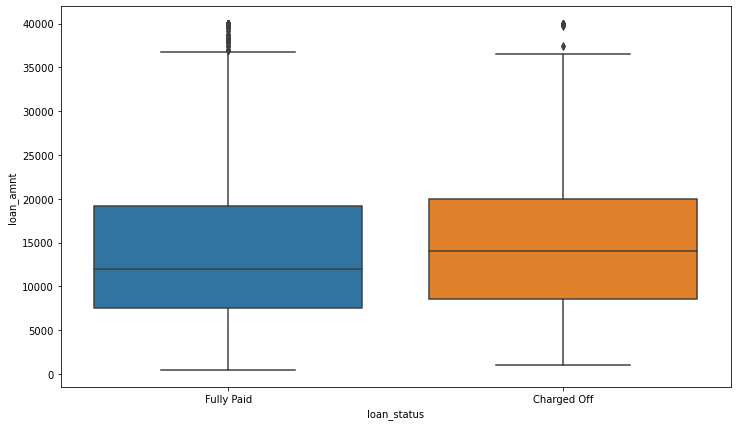

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

The goal here was to figure out if there is any relationship between large loan_amnt and not being able to pay but the box plot looks preety similar and doesn't give away much information of any sort of relationship. Let's check if there is a slight difference in number which is hard to tell by looking at the box plot.

In [36]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Here, we notice that the average loan_amnt of burrower who is unable to pay the loan is slighlty higher than the borrower who pays it, which is somewhat true. Higher the loan_amnt, it is harder to pay.|


Moving forward let's explore at the loan grade and subgrade. Firstly, lets find out how many unique grades and subgrades are there.

In [37]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [38]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

There are 5 grades and each grade have 5 subgrades. 

### Coutplot per grade

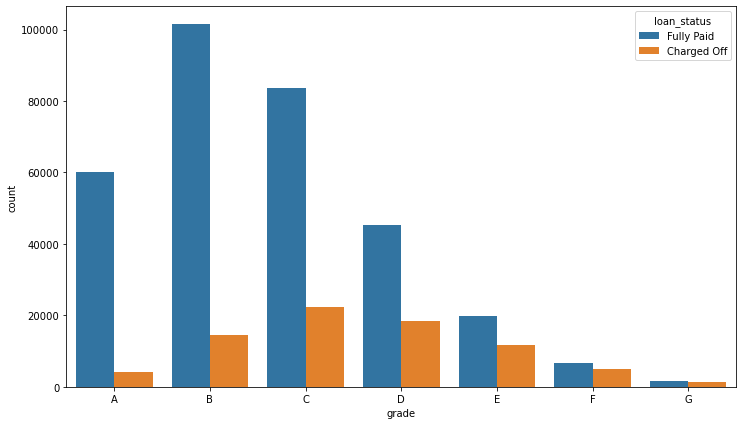

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(x='grade', data=df, hue='loan_status', order=sorted(df['grade'].unique()))

### Countplot per sub_grade

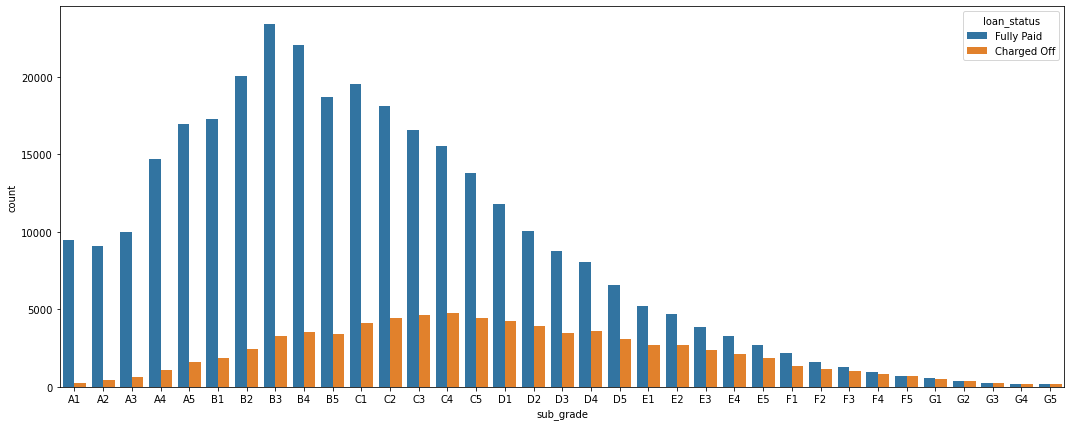

In [40]:
plt.figure(figsize=(18,7))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sorted(df['sub_grade'].unique()))

It looks like F and G subgrades don't get paid back that often. Lets isloate those and recreate the countplot just for those subgrades

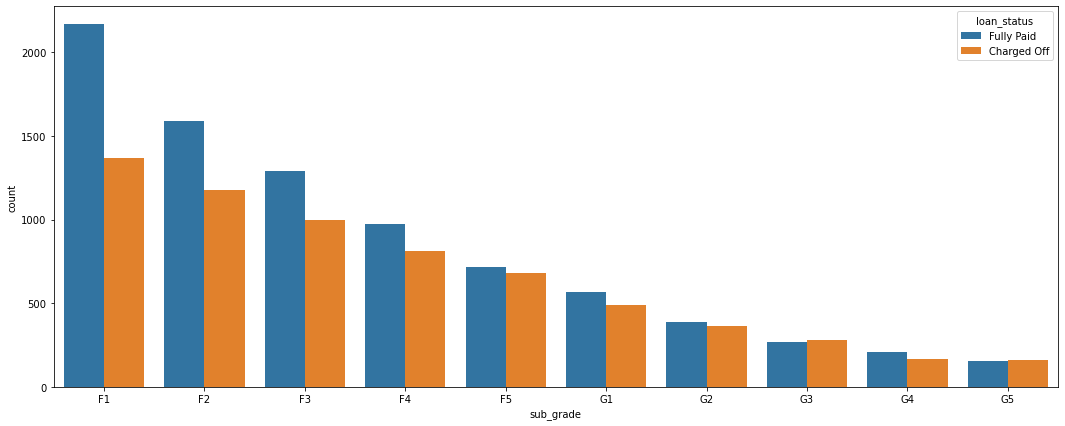

In [41]:
df_sub_grade = df[(df['grade'] == 'G') | (df['grade'] == 'F')]
plt.figure(figsize=(18,7))
sns.countplot(x='sub_grade', data=df_sub_grade, hue='loan_status', order=sorted(df_sub_grade['sub_grade'].unique()))

For G5, it seems like chances of not paying off the loan is slightly higher than full paying the loan.

## Data Cleaning and Preprocessing

### Missing Data

Firstly, let's explore the missing data columns. Also, using different factors let's decide whether the column is useful or not. If useful, let's fill the missing data using different techniques.

In [52]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

We can see that there are lot of **emp_title** missing. Similarly, **emp_length**, **title**, **revol_util**, **mort_acc** and **pub_rec_bankruptcies** columns also have missing data.\
Let's convert the above series into percentage to see what percentage of total dataframe does each missing data column accounts for.

In [53]:
100 * df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**mort_acc**, **emp_title** and **emp_length** have the most missing data.\
Let's start with **emp_title** and **emp_length** and see if it is ok to drop these columns.

In [58]:
get_feature_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [59]:
get_feature_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


Let's find out how many unique **emp_title** are there. 

In [62]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
Computer support                          1
rt. sales /  driver                       1
Cdl a driver                              1
Deparment of Homeland Security, TSA       1
Adirondack Arc                            1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many (173105) unique job titles to try to label encode into this to a dummy variable feature. So, let's remove that **emp_title** column.

In [64]:
df.drop('emp_title', axis=1, inplace=True)

Similary, let's look at **emp_length**. Firstly, lets check how many unique **emp_length** are there.

In [67]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

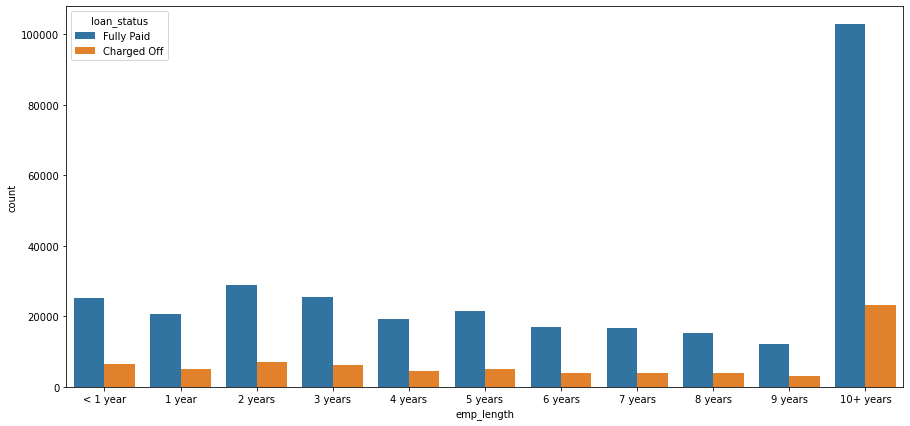

In [75]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

plt.figure(figsize=(15,7))
sns.countplot('emp_length', data= df, order=emp_length_order, hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.

In [81]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp = df.groupby("emp_length").count()['loan_status']

emp_len = 100 * (emp_co/emp)
emp_len

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

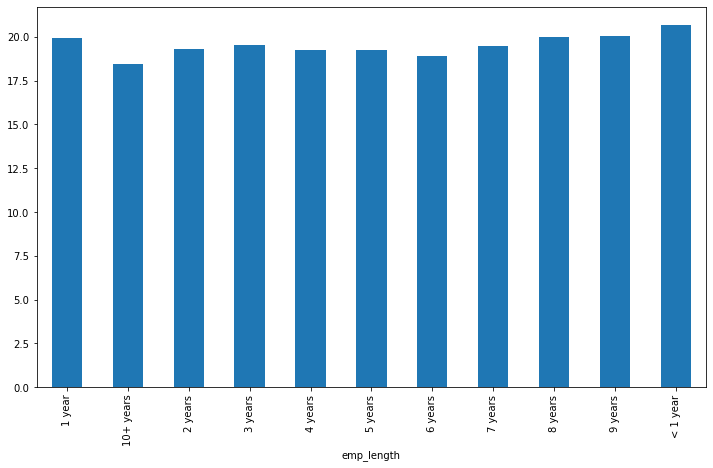

In [82]:
emp_len.plot(kind='bar', figsize=(12,7))

Charge off rates are extremely similar across all employment lengths. Let's drop the emp_length column.

In [83]:
df.drop('emp_length', axis=1, inplace=True)

Next two columns with missing values are **purpose** and **title**. Let's see what does each column contains.

In [84]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [85]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

This is a clear case of repeated information. It seems **title** is simple a string description if **purpose** column. Therefore, let's go ahead and drop the **title** column.

In [86]:
df.drop('title', axis=1, inplace=True)

In [87]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**mort_acc** accounts highest missing values. Let's see what it represents.

In [89]:
get_feature_info('mort_acc')

Number of mortgage accounts.


In [90]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to **mort_acc**

In [93]:
df.corr()['mort_acc'].sort_values().drop('mort_acc')

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

Looks like the **total_acc** feature correlates with the **mort_acc** , this makes sense! Let's try this fillna() approach. We will group the dataframe by the **total_acc**  and calculate the mean value for the **mort_acc**  per **total_acc**  entry.

In [94]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [98]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].agg('mean')
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [99]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util** and the **pub_rec_bankruptcies** have missing data points, but they account for less than 0.5% of the total data. Let's go ahead and remove the rows that are missing those values in those columns with dropna().

In [100]:
df = df.dropna()

In [102]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Label Encoding

Since our target variable **loan_status** is non numeric labels - *Fully Paid* and *Charged Off* let's perform **label encoding** to transform them to numberical label 0 and 1 in a separate new column **loan_repaid**.

#### loan_repaid
Also, let's drop the **loan_status** column after label encoding.

In [142]:
df['loan_repaid'] = df['loan_status'].map({'Charged Off': 0 ,'Fully Paid': 1})

In [43]:
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [143]:
df.drop('loan_status', axis=1, inplace=True)

Since we have performed label encoding, now lets see the correlation of all numerical attributes to this newly created **loan_repaid** column

In [44]:
df.corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

Lets visualise this result to understand it properly.

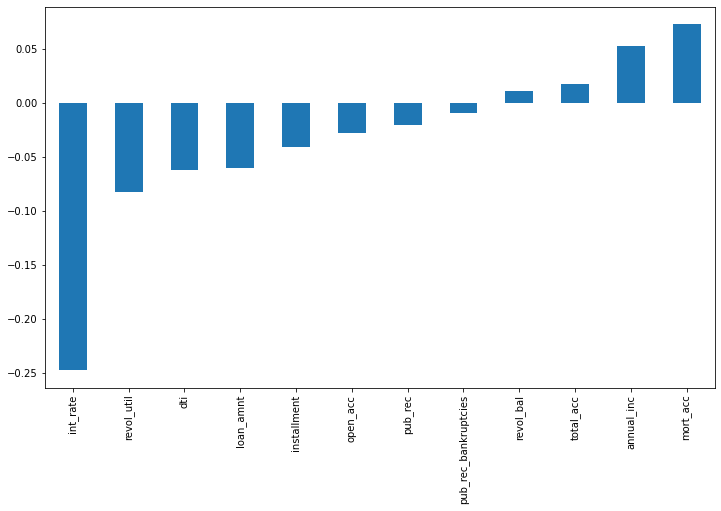

In [50]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar', figsize=(12,7))

We can see that interest rate has highest negative correlation if whether or not someone is going to repay a loan which somewhat makes sense if you have higher interest rate it will be harder to pay off that loan.

Lets list all the columns that are currently non-numeric.

In [105]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### term
Convert the term feature into either a 36 or 60 integer numeric data

In [108]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [110]:
df['term'] = df['term'].map({' 36 months': int(36), ' 60 months': int(60)})

#### grade
We have seen earlier that grade generalisation of subgrade therefore, let's drop the **grade** column.

In [113]:
df.drop('grade', axis=1, inplace=True)

#### sub_grade
Let's label encode the sub_grade column value to numeric using dummy variables.

In [114]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [115]:
df = pd.concat([df.drop('sub_grade',axis=1), subgrade_dummies],axis=1)

In [118]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

#### verification_status, application_type, initial_list_status, purpose
Let's do the same dummy variable thing to these 4 features

In [122]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]], drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1, inplace=True)
df = pd.concat([df,dummies],axis=1)

In [123]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

#### home_ownership
Let's convert MORTGAGE, RENT, OWN, OTHER, NONE and ANY  to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. 

In [121]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [124]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df.drop('home_ownership',axis=1, inplace=True)
df = pd.concat([df,dummies],axis=1)

#### address
Let's feature engineer a zip code column from the address in the data set. Let's create a column called 'zip_code' that extracts the zip code from the address column.

In [129]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [131]:
df.drop('address', axis=1, inplace=True)

Now let's make this **zip_code** column into dummy variables using pandas. Concatenate the result and drop the original **zip_code**

In [139]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df.drop('zip_code',axis=1, inplace=True)
df = pd.concat([df,dummies],axis=1)

#### issue_d
This is a date when loan was issued. We wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an **issue_d**. If included there would be a **data leakage** i.e. if any other feature whose value would not actually be available in practice at the time you’d want to use the model to make a prediction, is a feature that can introduce leakage to your model.

In [135]:
df.drop('issue_d', axis=1, inplace=True)

#### earliest_cr_line
This appears to be a historical time stamp feature. So, let's extract the year from this feature using a .apply function, then convert it to a numeric feature. Also, let's set this new data to a feature column called **earliest_cr_year**. Then drop the **earliest_cr_line** feature.

In [136]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [144]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

### Train Test Split

Let's import train_test_split from sklearn.

In [141]:
from sklearn.model_selection import train_test_split

Let's set X and y variables to the values of the features and label.

In [155]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Normalization
For normalization let's use a MinMaxScaler to normalize the feature data X_train and X_test. It is important to remember that we don't want data leakge from the test set so we only fit on the X_train data.

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating a Model

In [165]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [167]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Let's fit the model to the training data for at least **25 epochs**. Also let's add in the validation data for later plotting.

In [168]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3012 - val_loss: 0.2651
Epoch 2/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2653 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2629 - val_loss: 0.2627
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2617 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2610 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2603 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2597 - val_loss: 0.2621
Epoch 8/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2595 - val_loss: 0.2612
Epoch 9/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2589 - val_loss: 0.2624
Epoch 10/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.259

### Save the model

In [169]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')  

## Evaluating Model Performance.
Let's plot out the validation loss versus the training loss.

In [170]:
losses = pd.DataFrame(model.history.history)

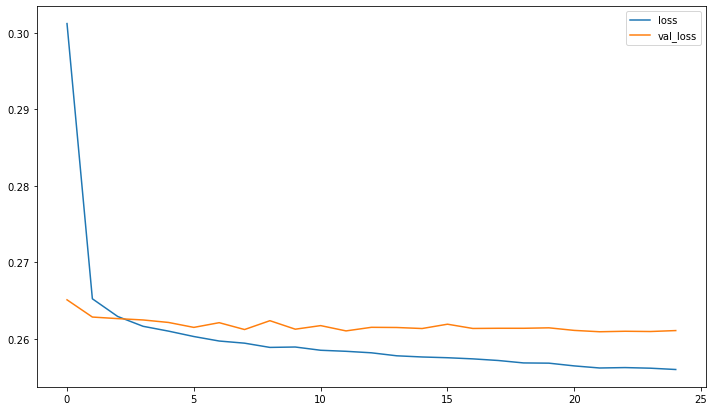

In [173]:
losses[['loss','val_loss']].plot(figsize=(12,7))

Now, let's create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [186]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [187]:
confusion_matrix(y_test,predictions)

array([[ 6956,  8702],
       [  180, 63206]])

Let's check, given the customer below, would you offer this person a loan?

In [188]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [189]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]], dtype=int32)

Now let's check, did this person actually end up paying back their loan?

In [190]:
df.iloc[random_ind]['loan_repaid']

1.0

**Yes, the person did pay the loan**